In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy

##### define grid and potential function #####

n = 101
#n_p = 21

grid_y1, grid_x1 = np.meshgrid(range(101), range(101))

grid_y1 -= 50
grid_y1 = grid_y1*0.2
grid_x1 -= 50
grid_x1 = grid_x1*0.2

def potential(r = 40,c = 50):
    x = np.random.normal(0,0,size = (n,n))
    for i in range(n):
        for j in range(n):
            r2 = ((i-c)**2+(j-c)**2)
            x[i,j] = max(1 - r2/r**2, 0)
            
    return copy.deepcopy(x)

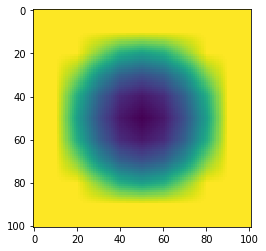

In [4]:
##### construct potential and sigma_m on the coarse grid + interpolation to the fine grid #####

V_coarse = -potential()[::10,::10]
from scipy.interpolate import interp2d

x = np.arange(0,101,10)
y = np.arange(0,101,10)
f = interp2d(x,y,V_coarse)
x_fine = np.arange(0,101)
y_fine = np.arange(0,101)
V = f(x_fine, y_fine)
#Sigma_m = 9
Sigma_m = -9*V
plt.imshow(V)

In [5]:
##### discretize Laplacian operator #####

lap = np.zeros((n*n,n*n))

def index(i,j):
    return i*n+j

for i in range(n-1):
    for j in range(n-1):
        # row neighbor
        lap[index(i,j),index(i,j)] = -4
        lap[index(i,j),index(i,j+1)] = 1
        lap[index(i,j+1),index(i,j)] = 1
        lap[index(i+1,j),index(i,j)] = 1
        lap[index(i,j),index(i+1,j)] = 1

for j in range(n-1):
    i = n-1
    lap[index(i,j),index(i,j)] = -4
    lap[index(i,j),index(i,j+1)] = 1
    lap[index(i,j+1),index(i,j)] = 1
    
for i in range(n-1):
    j = n-1
    lap[index(i,j),index(i,j)] = -4
    lap[index(i+1,j),index(i,j)] = 1
    lap[index(i,j),index(i+1,j)] = 1
    
lap[index(n-1,n-1),index(n-1,n-1)] = -4

In [6]:
##### construct Hamiltonian #####
Sigma_m = Sigma_m.reshape(-1)
lap = 1/2*(Sigma_m[:,np.newaxis]*lap+lap*Sigma_m[np.newaxis,:])
H = -1/2*lap + np.diag(V.reshape(-1))

In [9]:
##### compute eigenmodes will smallest real part #####

import scipy.sparse.linalg
result = scipy.sparse.linalg.eigs(H, which='SR',k=21)

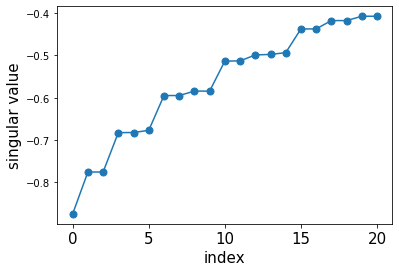

In [15]:
##### eigen-energies #####

x = np.real(result[0])
indices = np.argsort(x)[:21]
plt.plot(np.arange(21), x[indices], markersize=7, marker="o")
plt.xticks([0,5,10,15,20],fontsize=15)
#plt.yticks([1.0,1.2,1.4,1.6,1.8],fontsize=15)
plt.xlabel("index", fontsize=15)
plt.ylabel("singular value", fontsize=15)
np.save('./results/coarse_se_sv.npy', x)
#plt.savefig("./fig/fine_se_sv.pdf", bbox_inches="tight")

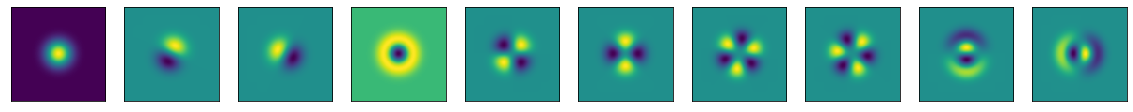

In [14]:
##### Eigen-states #####

plt.figure(figsize=(20,20))
modes = np.real(result[1])
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow((modes[:,i].reshape(101,101)))
    #plt.clim(-2e-2,2e-2)
#plt.show()
np.save('./results/coarse_se_comp.npy', modes)
#plt.savefig("./fig/fine_pca_comp.pdf", bbox_inches="tight")